In [12]:
import numpy as np

# Define the fitness function
def fitness_function(x, y, z):
   # x, y, z = individual['x'], individual['y'], individual['z']
    term1 = 2 * x * z * np.exp(-x)
    term2 = -2 * y**3
    term3 = y**2
    term4 = -3 * z**3
    term5 = np.cos(x * z) / (1 + np.exp(-(x + y)))
    
    fitness = term1 + term2 + term3 + term4 + term5
    return fitness

    
# Define the GA parameters
population_size = 100
num_generations = 20
mutation_rate = 0.1
crossover_rate = 0.7
bounds = {'x': (0, 5), 'y': (1, 10), 'z': (-2, 4)}

# Initialize the population
def initialize_population(size, bounds):
    population = []
    for _ in range(size):
        individual = {
            'x': np.random.uniform(*bounds['x']),
            'y': np.random.uniform(*bounds['y']),
            'z': np.random.uniform(*bounds['z'])
        }
        population.append(individual)
    return population

# Evaluate the population
def evaluate_population(population):
    fitness_values = []
    for individual in population:
        fitness = fitness_function(individual['x'], individual['y'], individual['z'])
        fitness_values.append(fitness)
    return fitness_values

# Select parents using roulette wheel selection
def select_parents(population, fitness_values):
    fitness_values = np.array(fitness_values)
    # Ensure non-negative fitness values for selection
    fitness_values = np.maximum(fitness_values, 0)
    total_fitness = fitness_values.sum()
    
    if total_fitness <= 0:
        raise ValueError("Total fitness is non-positive; check fitness function.")
    
    probabilities = fitness_values / total_fitness
    indices = np.arange(len(population))
    parents = np.random.choice(indices, size=len(population), p=probabilities)
    return [population[i] for i in parents]

# Perform crossover between two parents
def crossover(parent1, parent2):
    if np.random.rand() < crossover_rate:
        alpha = np.random.rand()
        child1 = {
            'x': alpha * parent1['x'] + (1 - alpha) * parent2['x'],
            'y': alpha * parent1['y'] + (1 - alpha) * parent2['y'],
            'z': alpha * parent1['z'] + (1 - alpha) * parent2['z']
        }
        child2 = {
            'x': (1 - alpha) * parent1['x'] + alpha * parent2['x'],
            'y': (1 - alpha) * parent1['y'] + alpha * parent2['y'],
            'z': (1 - alpha) * parent1['z'] + alpha * parent2['z']
        }
        return child1, child2
    else:
        return parent1, parent2

# Perform mutation on an individual
def mutate(individual, bounds):
    if np.random.rand() < mutation_rate:
        gene = np.random.choice(['x', 'y', 'z'])
        individual[gene] = np.random.uniform(*bounds[gene])
    return individual

# Main GA function
Scores=[]
def genetic_algorithm():
    population = initialize_population(population_size, bounds)
    for generation in range(num_generations):
        fitness_values = evaluate_population(population)
        population = select_parents(population, fitness_values)
        
        new_population = []
        for i in range(0, population_size, 2):
            parent1 = population[i]
            parent2 = population[i + 1]
            child1, child2 = crossover(parent1, parent2)
            new_population.append(mutate(child1, bounds))
            new_population.append(mutate(child2, bounds))
        
        population = new_population
        
        best_individual = max(population, key=lambda ind: fitness_function(ind['x'], ind['y'], ind['z']))
        best_fitness = fitness_function(best_individual['x'], best_individual['y'], best_individual['z'])
        print(f"Generation {generation + 1}: Best Fitness = {best_fitness:.4f}, x = {best_individual['x']:.4f}, y = {best_individual['y']:.4f}, z = {best_individual['z']:.4f}")
        Scores.append(np.max(fitness_values))

    return best_individual



# Run the GA
best_solution = genetic_algorithm()
print(f"Best solution found: x = {best_solution['x']:.4f}, y = {best_solution['y']:.4f}, z = {best_solution['z']:.4f}")


Generation 1: Best Fitness = 4.4844, x = 3.9661, y = 1.0093, z = -1.2277
Generation 2: Best Fitness = 11.2827, x = 0.5109, y = 1.0093, z = -1.6202
Generation 3: Best Fitness = 11.2827, x = 0.5109, y = 1.0093, z = -1.6202
Generation 4: Best Fitness = 11.2827, x = 0.5109, y = 1.0093, z = -1.6202
Generation 5: Best Fitness = 11.2827, x = 0.5109, y = 1.0093, z = -1.6202
Generation 6: Best Fitness = 10.4750, x = 0.5550, y = 1.0093, z = -1.5873
Generation 7: Best Fitness = 10.4750, x = 0.5550, y = 1.0093, z = -1.5873
Generation 8: Best Fitness = 10.4750, x = 0.5550, y = 1.0093, z = -1.5873
Generation 9: Best Fitness = 10.4750, x = 0.5550, y = 1.0093, z = -1.5873
Generation 10: Best Fitness = 9.9571, x = 0.5666, y = 1.0093, z = -1.5640
Generation 11: Best Fitness = 9.4076, x = 0.5187, y = 1.0099, z = -1.5335
Generation 12: Best Fitness = 19.6239, x = 0.6015, y = 1.0093, z = -1.9311
Generation 13: Best Fitness = 17.4228, x = 0.6012, y = 1.0093, z = -1.8606
Generation 14: Best Fitness = 15.3126

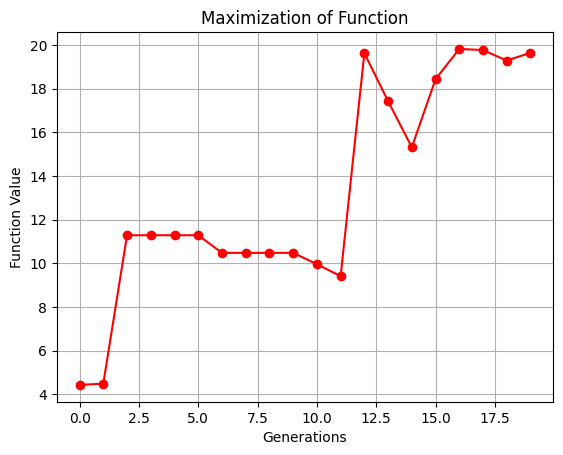

In [13]:
import matplotlib.pyplot as plt

Evaluations = Scores
plt.plot(Evaluations,'o-',color='red')
#plt.yscale('log')
plt.xlabel('Generations')
plt.ylabel('Function Value')
plt.title("Maximization of Function")
plt.grid(True)
plt.show()